### Load Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()



In [2]:
purch_df = pd.read_csv("purchase data.csv")

In [3]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
pca = pickle.load(open('pca.pickle', 'rb'))

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
kmns_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
features = purch_df[['Marital status','Age','Sex','Income','Education','Occupation','Settlement size']]


In [7]:
purch_df_sgmnt_ss = scaler.transform(features)

In [8]:
# Apply PCA

purch_df_sgmnt_pca = pca.transform(purch_df_sgmnt_ss)

In [9]:
# Segment data
purch_df_sgmnt_kmns = kmns_pca.predict(purch_df_sgmnt_pca)

In [10]:
# Create a copy of the data frame
# df_purchase_predictors = df_purchase.copy()


purch_df_predictors = purch_df.copy()

In [11]:
purch_df_predictors['Segment'] = purch_df_sgmnt_kmns

In [12]:
# Add segment labels
# df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
# segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
# df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

# df_pa = df_purchase_predictors

segment_dummies = pd.get_dummies(purch_df_sgmnt_kmns, prefix='Segment', prefix_sep='_')
purch_df_predictors = pd.concat([purch_df_predictors, segment_dummies], axis=1)
pa_df = purch_df_predictors
pa_df

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,47,1,110866,1,0,3,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,47,1,110866,1,0,3,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,47,1,110866,1,0,3,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,47,1,110866,1,0,3,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,47,1,110866,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,42,1,120946,1,0,3,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,42,1,120946,1,0,3,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,42,1,120946,1,0,3,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,42,1,120946,1,0,3,1


### Purchase Probability Model

In [31]:
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = pa_df['Incidence']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Incidence, dtype: int64

In [32]:
# Our dependent variable is based on the average price of chocolate candy bars
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (pa_df['Price_1'] +
                   pa_df['Price_2'] +
                   pa_df['Price_3'] +
                   pa_df['Price_4'] +
                   pa_df['Price_5'] ) / 5
X.head()

,Mean_Price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


In [15]:
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purch = LogisticRegression()
model_purch.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model_purch.coef_

array([[-2.3480548]])

In [17]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.

pa_df[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [38]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 

price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [39]:
df_price_range = pd.DataFrame(price_range)
df_price_range.head()

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54


In [20]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.

Y_pr = model_purch.predict_proba(df_price_range)
purch_pr = Y_pr[:][:, 1]
pe = model_purch.coef_[:, 0] * price_range * (1 - purch_pr)

In [34]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.

df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities.head()

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54


In [35]:
df_price_elasticities = df_price_elasticities.rename(columns = {0:'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities.head()

,Price_Point,Mean_PE
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442


In [36]:
pd.options.display.max_rows = None
df_price_elasticities.head()

,Price_Point,Mean_PE
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442


Text(0.5, 1.0, 'Price elasticity of Purchase Probability')

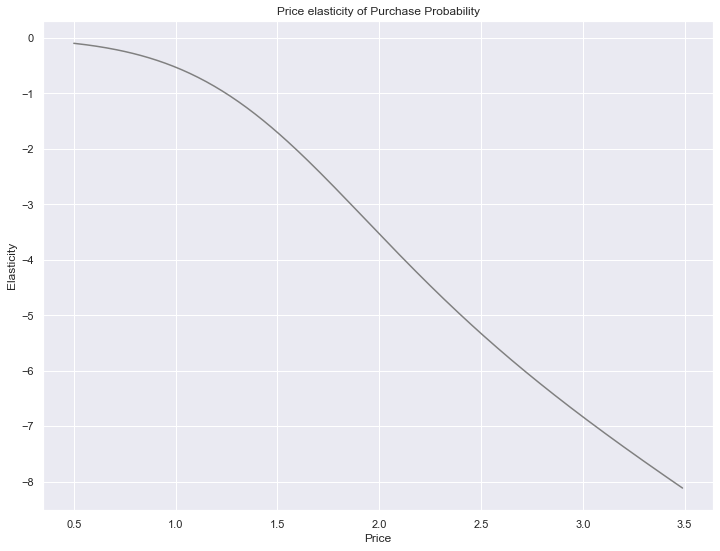

In [24]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.

plt.figure(figsize=(12, 9))
plt.plot(price_range, pe, color='grey')
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Price elasticity of Purchase Probability")

# Purchase Probability by Segment

### Segment 1 - Career Focus

In [25]:
# We filter the data to contain only customers from segment 1, the career-focused.
df_pa_segment_1 = pa_df[pa_df['Segment'] == 1]

In [26]:
# Again we want to predict the purchase probability, so our Y variable is the incidence column.
# Only here we select only the customers from the first segment.
Y = df_pa_segment_1['Incidence']

In [27]:
X = pd.DataFrame()

In [28]:
# We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [45]:
# Fit logistic regression model
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X,
                              Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)